In [ ]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
from scipy.optimize import curve_fit
import os 
import pandas as pd 

In [38]:
# Ruta de la carpeta (usa una raw string para evitar errores con '\')
file_path = r'\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1'

# Lista para almacenar los datos
data = []

# Recorre todos los archivos en la carpeta y subcarpetas
for root, dirs, files in os.walk(file_path):
    for filename in files:
        name, ext = os.path.splitext(filename)
        full_path = os.path.join(root, filename)
        data.append({
            'File Name': name,
            'Extension': ext,
            'Full Path': full_path
        })

# Convierte los datos a un DataFrame para visualizarlos fácilmente
df = pd.DataFrame(data)

# Muestra las primeras filas
print(df.head())

print(f"\nTotal files found: {len(df)}")

                                 File Name Extension  \
0  TimeTags_QWP_000deg_2025-11-13_184533.1    .ttbin   
1    TimeTags_QWP_000deg_2025-11-13_184533    .ttbin   
2  TimeTags_QWP_010deg_2025-11-13_184606.1    .ttbin   
3    TimeTags_QWP_010deg_2025-11-13_184606    .ttbin   
4  TimeTags_QWP_020deg_2025-11-13_184641.1    .ttbin   

                                           Full Path  
0  \\SERVER\groups\ding\PROJECTS\QKD_Perovskites\...  
1  \\SERVER\groups\ding\PROJECTS\QKD_Perovskites\...  
2  \\SERVER\groups\ding\PROJECTS\QKD_Perovskites\...  
3  \\SERVER\groups\ding\PROJECTS\QKD_Perovskites\...  
4  \\SERVER\groups\ding\PROJECTS\QKD_Perovskites\...  

Total files found: 74


In [39]:
channel_1 = []
channel_2 = []
channel_3 = []
channel_4 = []

for i in range(1, len(df), 2):

    print(df['Full Path'].iloc[i])
    file = df['Full Path'].iloc[i]
    fr = FileReader(file)
    print("Has data? ->", fr.hasData())

    config = fr.getConfiguration()
    virtual_tagger = createTimeTaggerVirtual()
    virtual_tagger.getConfiguration()

    ch1 = config['registered channels'][0]  
    ch2 = config['registered channels'][1]  
    ch3 = config['registered channels'][2]
    ch4 = config['registered channels'][3]

    cr = Countrate(virtual_tagger, [ch1, ch2, ch3, ch4])
    virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
    virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
    virtual_tagger.waitForCompletion()

    data = cr.getData()
    data_rounded = [round(float(x), 3) for x in data]  # redondear a 3 decimales

    channel_1.append(data_rounded[0])
    channel_2.append(data_rounded[1])
    channel_3.append(data_rounded[2])
    channel_4.append(data_rounded[3])

channel_1 = np.array(channel_1)
channel_2 = np.array(channel_2)
channel_3 = np.array(channel_3)
channel_4 = np.array(channel_4)

\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_000deg_2025-11-13_184533.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_010deg_2025-11-13_184606.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_020deg_2025-11-13_184641.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_030deg_2025-11-13_184723.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_040deg_2025-11-13_184800.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_050deg_2025-11-13_184903.ttbin
Has data? -> True
\\SERVER\groups\ding\PROJECTS\QKD_Perovskites\PerformanceReceiver\20251113\Meas_1\TimeTags_QWP_060deg_2025-11-13_184954.ttbin
Has data? 

In [40]:
angle = np.arange(0, 361, 10)

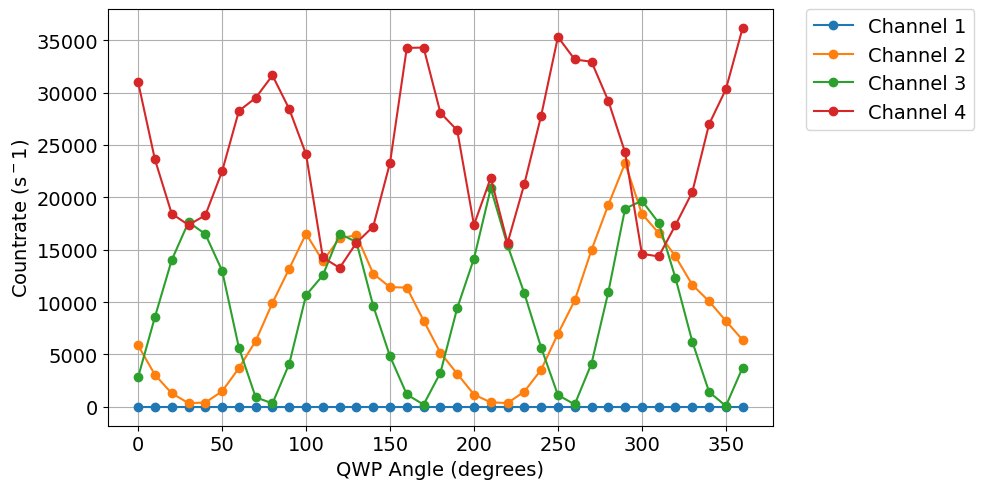

In [41]:
fontsize = 14  # Desired font size

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(angle, channel_1, marker='o', label=f"Channel 1")
plt.plot(angle, channel_2, marker='o', label="Channel 2")
plt.plot(angle, channel_3, marker='o', label="Channel 3")
plt.plot(angle, channel_4, marker='o', label="Channel 4")

# Axes labels and tick configuration
plt.xlabel("QWP Angle (degrees)", fontsize=fontsize)
plt.ylabel(f"Countrate (s$^{-1}$)", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Legend outside the plot (upper left corner)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=fontsize)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

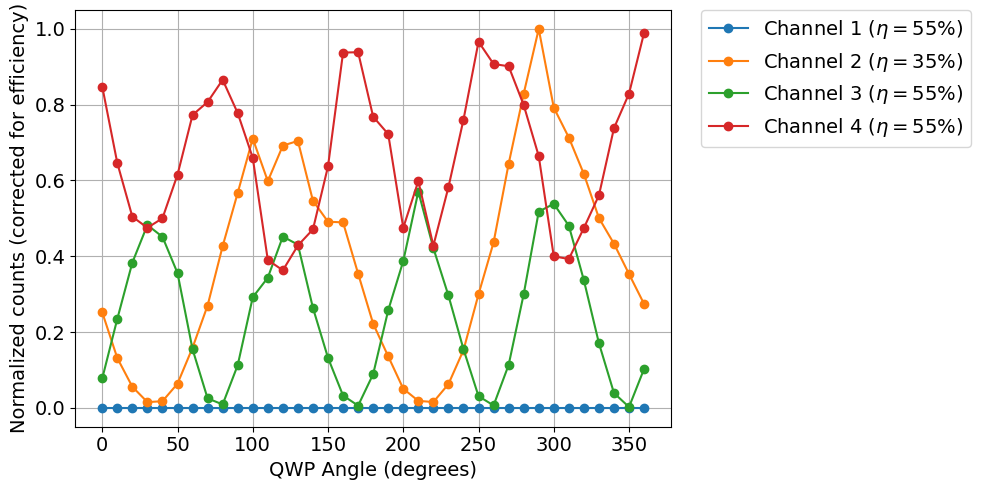

In [42]:
max_counts = np.max([np.max(channel_1/0.55), np.max(channel_2/0.35), np.max(channel_3/0.55), np.max(channel_4/0.55)])

channel_1_norm = (channel_1/0.55)/ max_counts
channel_2_norm = (channel_2/0.35)/ max_counts
channel_3_norm = (channel_3/0.55)/ max_counts
channel_4_norm = (channel_4/0.55)/ max_counts

fontsize = 14  # Desired font size

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(angle, channel_1_norm, marker='o', label=f"Channel 1 ($\\eta = 55\\%$)")
plt.plot(angle, channel_2_norm, marker='o', label="Channel 2 ($\\eta = 35\\%$)")
plt.plot(angle, channel_3_norm, marker='o', label="Channel 3 ($\\eta = 55\\%$)")
plt.plot(angle, channel_4_norm, marker='o', label="Channel 4 ($\\eta = 55\\%$)")

# Axes labels and tick configuration
plt.xlabel("QWP Angle (degrees)", fontsize=fontsize)
plt.ylabel("Normalized counts (corrected for efficiency)", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Legend outside the plot (upper left corner)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=fontsize)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

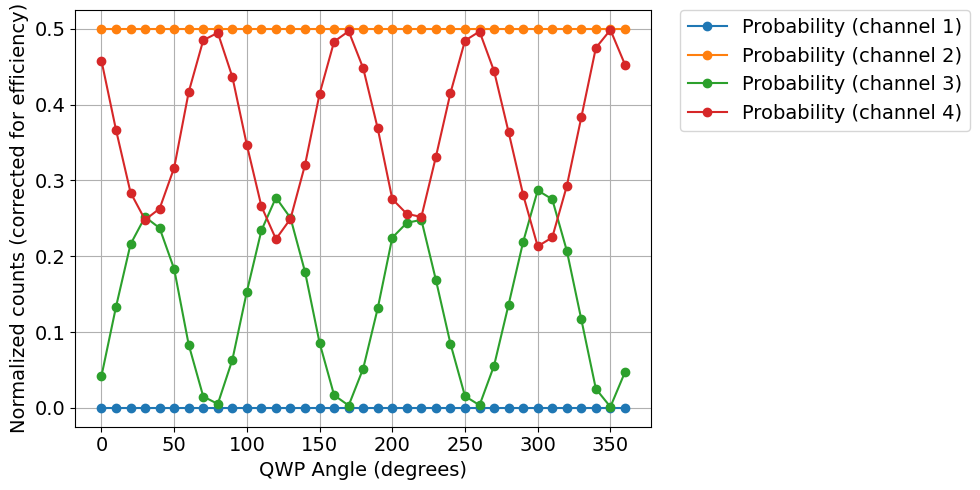

In [43]:
total_12 = channel_1 + channel_2
total_34 = channel_3 + channel_4

# Probability 1: channel_1 / (channel_1 + channel_2)
prob_1 = np.divide(channel_1, total_12, out=np.zeros_like(channel_1), where=total_12!=0)
# Probability 2: channel_2 / (channel_1 + channel_2)
prob_2 = np.divide(channel_2, total_12, out=np.zeros_like(channel_2), where=total_12!=0)
# Probability 3: channel_3 / (channel_3 + channel_4)
prob_3 = np.divide(channel_3, total_34, out=np.zeros_like(channel_1), where=total_34!=0)
# Probability 4: channel_4 / (channel_3 + channel_4)
prob_4 = np.divide(channel_4, total_34, out=np.zeros_like(channel_2), where=total_34!=0)

fontsize = 14  # Desired font size

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(angle, prob_1/2, marker='o', label=f"Probability (channel 1)")
plt.plot(angle, prob_2/2, marker='o', label="Probability (channel 2)")
plt.plot(angle, prob_3/2, marker='o', label=f"Probability (channel 3)")
plt.plot(angle, prob_4/2, marker='o', label="Probability (channel 4)")

# Axes labels and tick configuration
plt.xlabel("QWP Angle (degrees)", fontsize=fontsize)
plt.ylabel("Normalized counts (corrected for efficiency)", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Legend outside the plot (upper left corner)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=fontsize)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()